In [1]:
import cv2
from constants import IMAGE_PATH
from matplotlib import pyplot as plt


In [2]:
import numpy as np


example_im_path = f"{IMAGE_PATH}/000155de5.jpg"

im_d = cv2.imread(example_im_path)

if im_d is None:
    raise FileNotFoundError(f"Image not found at path: {example_im_path}")

im : np.ndarray = im_d

print(im.shape)



(768, 768, 3)


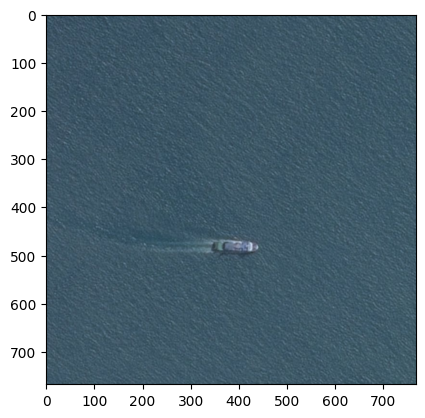

In [3]:
plt.imshow(im[:, :, ::-1])

plt.show()

In [4]:
import pandas as pd

from constants import DATA_PATH

df = pd.read_csv(f"{DATA_PATH}/segmentations.csv")

# Group RLEs by ImageId and convert each group into a list of strings
rle_dict = (
    df.groupby('ImageId')['EncodedPixels']
      .apply(list)
      .to_dict()
)


In [5]:
im_rles = rle_dict['000155de5.jpg']
im_rles

['264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971 33 310739 33 311507 33 312275 33 313043 33 313811 33 314579 33 315347 33 316115 33 316883 33 317651 33 318419 33 319187 33 319955 33 320723 33 321491 33 322259 33 323027 33 323795 33 324563 33 325331 33 326099 33 326867 33 327635 33 328403 33 329171 33 329938 34 330706 34 331474 33 332242 33 333010 33 333778 33 334546 33 335314 33 336082 33 336850 33 337618 33 338386 33 339154 33 339922 33 340690 3

In [6]:
import torch, sys
print("Torch file:", torch.__file__)
print("Torch CUDA version:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
print("Python exe:", sys.executable)
print("Python version:", sys.version)


Torch file: c:\Projects\University\deep-learning-labs\satellite_imaging\.venv\lib\site-packages\torch\__init__.py
Torch CUDA version: 13.0
CUDA available: True
Python exe: c:\Projects\University\deep-learning-labs\satellite_imaging\.venv\Scripts\python.exe
Python version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [ ]:
from sam_predictor import get_image_iou_mat, mask_generator_pipeline
from util.general_utils import rles_to_masks

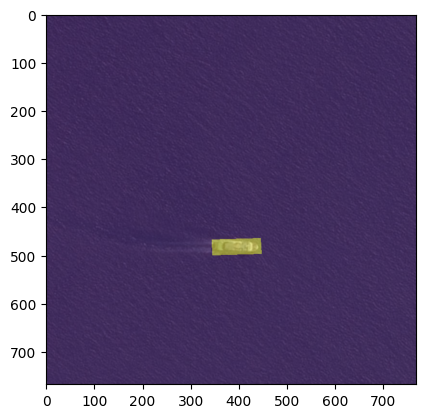

In [13]:
g_mask = rles_to_masks(im_rles, im.shape[0], im.shape[1])

plt.imshow(im[:, :, ::-1])

for mask in g_mask:
    plt.imshow(mask, alpha=0.5)

plt.show()



In [25]:
p_mask = mask_generator_pipeline(im)

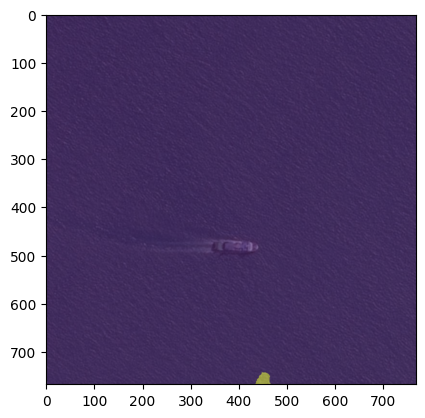

In [26]:
plt.imshow(im[:, :, ::-1])

for mask in p_mask:
    plt.imshow(mask, alpha=0.5)

plt.show()

In [ ]:
iou_matrix = get_image_iou_mat((im, im_rles))

iou_matrix

array([[0.]], dtype=float32)